# Ejercicios para practicar LECTURA Y ESCRITURA DE FICHEROS
Descarga el archivo comprimido que se adjunta con la tarea. Debes descomprimirlo en una carpeta conocida. Este archivo contiene 35 CSVs con los datos de mercado de cada una de las empresas del IBEX 35, el índice bursatil de España.  

**1.**-  Debes escribir un programa que consiga los siguientes objetivos:

1. Lista los archivos con extensión .CSV del directorio donde has descomprimido los 35 archivos e importa los mismos mediante un bucle. Te sugiero que hagas una lista o algún tipo de elemento iterable con todos los dataframes. 
2. Muestra en una gráfica los valores medios diários de cada uno de las empresas (columna 'average') de los meses de octubre, noviembre y diciembre de 2019. Sugerencias:
    - Para filtrar por fecha puedes usar el método loc() del DataFrame. Para crear la fecha de referencia puedes usar el paquete datetime (import datetime as dt) y crearla así "fecha_limite = dt.datetime(2019, 10, 1)". Para transformar todos los strings de fecha de los DataFrames en objetos de tipo datetime puedes usar la siguiente función: "pd.to_datetime(df['Date'],dayfirst=True)".
    - Para hacer la gráfica puedes usar el paquete matplotlib. 
3. Crea un dataframe con las siguientes columnas:
    - Código que identifica a cada empresa.
    - Porcentaje de variación de su valor en la última semana ((ValorFinal-ValorInicial)*100/ValorInicial).
    - Porcentaje de variación de su valor en el último mes.
    - Porcentaje de variación de su valor en el último trimestre.
4. Crea una función que reciba una fecha, importe los datasets de los valores de bolsa y te devuelva el código de empresa que ha subido más en la última semana (en porcentaje).

In [ ]:
import pandas as pd
import os

# Meter todos los archivos en la lista archivos_csv, filtrando por .csv
archivos_csv = []
for archivo in os.listdir():
    if archivo.lower().endswith('.csv'):
        archivos_csv.append(archivo)

dataframes = []

# 1. Importar cada CSV mediante un bucle
for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    dataframes.append(df)

df.head()


,Ticker,Date,Close,Reference,Volume,Turnover,Last,High,Low,Average
0,CIE,02/01/2019,21.30,21.14,222965,4716201.80,21.30,21.48,20.56,21.1522
1,CIE,03/01/2019,20.80,21.30,179146,3733973.34,20.80,21.32,20.62,20.8432
2,CIE,04/01/2019,22.08,20.80,280642,6102512.66,22.08,22.08,21.00,21.7448
3,CIE,07/01/2019,21.84,22.08,236814,5183544.40,21.84,22.38,21.72,21.8887
4,CIE,08/01/2019,22.46,21.84,235226,5262483.18,22.46,22.68,21.68,22.3720


,Ticker,Date,Close,Reference,Volume,Turnover,Last,High,Low,Average
240,CIE,2019-12-09,21.28,21.56,103015,2206860.70,21.28,21.74,21.28,21.4227
241,CIE,2019-12-10,21.08,21.28,326778,6855438.42,21.08,21.34,20.72,20.9775
242,CIE,2019-12-11,20.96,21.08,167104,3510741.38,20.96,21.26,20.80,21.0135
243,CIE,2019-12-12,21.44,20.96,202560,4292962.06,21.44,21.54,20.84,21.1935
244,CIE,2019-12-13,22.04,21.44,327281,7199975.66,22.04,22.28,21.76,21.9979


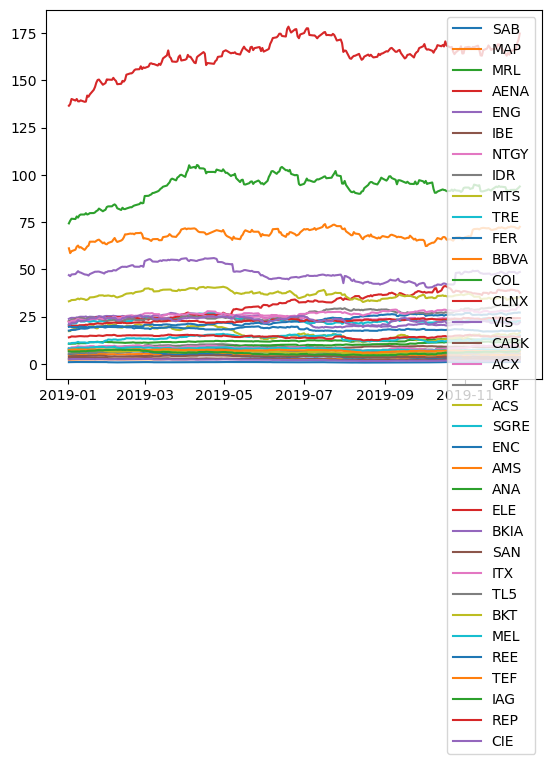

In [ ]:
# 2. Crea una gráfica con media, desde los meses de octubre, noviembre y diciembre de 2019.
import datetime as dt
import matplotlib.pyplot as plt

fecha_limite = dt.datetime(2019, 10, 1)
leyenda = []

for df in dataframes:
    df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)
    df_ordenado = df.loc[df["Date"] >= fecha_limite]
    # Debemos de meter todas las gráficas
    # Crear gráfica con su leyenda correspondiente
    leyenda.append(df["Ticker"][0])
    plt.plot(df["Date"], df["Average"])

plt.legend(leyenda)
df_ordenado.tail()
    


In [5]:
# 3. Crea un dataframe con las siguientes columnas:
#    - Código que identifica a cada empresa.
#    - Porcentaje de variación de su valor en la última semana ((ValorFinal-ValorInicial)*100/ValorInicial).
#    - Porcentaje de variación de su valor en el último mes.
#    - Porcentaje de variación de su valor en el último trimestre.

valor_semana = []
valor_mes = []
valor_trimestre = []
codigo = []

for df in dataframes:
    codigo.append(df["Ticker"].iloc[0])

    valor_semana.append((df["Average"].iloc[-1] - df["Average"].iloc[-7]) * 100 / df["Average"].iloc[-7])
    valor_mes.append((df["Average"].iloc[-1] - df["Average"].iloc[-30]) * 100 / df["Average"].iloc[-30])
    valor_trimestre.append((df["Average"].iloc[-1] - df["Average"].iloc[-90]) * 100 / df["Average"].iloc[-90])

df_nuevo = pd.DataFrame({"Ticker" : codigo, "Valor_semana" : valor_semana, "Valor_mes" : valor_mes, "Valor_trimestre" : valor_trimestre})

print(df_nuevo)


   Ticker  Valor_semana  Valor_mes  Valor_trimestre
0     SAB      6.396135   8.226044        44.514436
1     MAP      1.842209   1.334537         7.365050
2     MRL     -1.418677  -3.889867         4.943252
3    AENA      6.820505   4.201975         6.548411
4     ENG     -0.670455   1.502824        11.946681
5     IBE      3.213887  -1.856372         0.952499
6    NTGY     -0.576930  -4.970840        -3.176821
7     IDR      4.096305   7.755408        32.961874
8     MTS      6.613537  14.863179        39.099740
9     TRE      2.798001  -1.421385         6.812866
10    FER      2.213379   0.664313         9.274288
11   BBVA      5.400502   2.789722        15.540087
12    COL     -1.145637  -2.212497         9.520323
13   CLNX     -3.122763  -0.790652         4.809784
14    VIS     -0.144831   0.420242        12.365158
15   CABK      2.742177   4.812635        31.892753
16    ACX      3.247309  11.683197        36.848436
17    GRF      3.122306   6.128867         8.766789
18    ACS   

In [ ]:
# 4. Crea una función que reciba una fecha, importe los datasets de los valores de bolsa 
# y te devuelva el código de empresa que ha subido más en la última semana (en porcentaje).

# Crear listas para cargar informacion
csv = []
code = []
valor_semanal = []
datas = []

def recibeFecha (fecha):
    # Cargar todos los csv, del directorio filtrando para que acabe en .csv
    for archivo in os.listdir():
        if archivo.lower().endswith('.csv'):
            csv.append(archivo)

    # Cargar todos los csv, los cuales se encuentran en la variable archivo
    for archivo in csv:
        dfs = pd.read_csv(archivo)
        dfs['Date'] = pd.to_datetime(dfs['Date'], dayfirst=True)
        datas.append(dfs)

    # Haciendo un bucle, para poder devolver el codigo de la empresa y calcular el porcentaje de subida
    for dfs in datas:
        df_filtrada = dfs[dfs['Date'] <= fecha]
        code.append(dfs["Ticker"].iloc[0])
        valor_semanal.append((df_filtrada["Average"].iloc[-1] - df_filtrada["Average"].iloc[-7]) * 100 / df_filtrada["Average"].iloc[-7])

    # Creacion del dataframe
    df_subida = pd.DataFrame({"Ticker" : code, "Porcentaje" : valor_semanal})

    elegido = df_subida.sort_values("Porcentaje", ascending=False)
    definitivo = elegido.head(1)
    return definitivo

recibeFecha(dt.datetime(2019, 5, 25))

,Ticker,Porcentaje
10,FER,3.202643
